
## **Problem Statement**

# Have you ever wondered when the best time of year to book a hotel room is? Or the optimal lenght of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special request? 

# This hotel booking dataset can help you explore those question! This dataset contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. 

# **Explore and analyse the data to discover important factors that govern the bookings.**

# ***Business Objective*** - We have given the dataset of hotel booking, In the provided dataset contains the information of Hotel type , Meal type, Stay duration , etc. While any tour or trip I don't want to pay any amount randomly, rather I will pay some optimized money for stay. And I wan't my vacation to be safe with good stay and good meal with optimized money. 

# This analysis will help the tourist to choose the right hotel,right price, Proper and safe stay also it helps Hotel Management to take right decision for making any changes in service level.

# Step 1: Know your data 

In [1]:
# Importing the required library
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset Loading 

In [2]:
# Mount the drive to the notebook 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing the dataset from the drive
df_data = pd.read_csv("/content/drive/My Drive/EDA - HOTEL BOOKING ANALYSIS/Hotel Bookings.csv")

# Dataset First View

In [4]:
# Let's make a copy of our data , so original data will not be affect
df = df_data.copy()

In [5]:
#Let's take a first view of data 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
# Check the dataset row and column 
df.shape

(119390, 32)

# Dataset Information 

In [8]:
# Let's check the info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Missing Values/Null Values

In [10]:
#Checking the total null values in data
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# In this above Null data
# 4 null values present in 'Children'
# 488 null values present in 'country'
# 16340 null values present in 'agent'
# 112593 null values present in 'company'

#As 'Company' has huge amount of Null values so we will drop this column to make further analysis easy

In [12]:
df.drop(['company'], axis=1, inplace = True)

In [13]:
# Now we will fill remaining null data with zero
df['children'].fillna(value = 0, inplace = True)
df['agent'].fillna(value = 0, inplace = True)
df['country'].fillna(value = 'Others', inplace = True)

In [14]:
# Verify again the data 
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# Hence no any null value pending in this dataset now we are ready to go ahead

In [15]:
# Checking the data types 
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# **Step 2: Understanding Your Variables**

In [16]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


# **Variables Description**
Some of important varibales
1. hotel: type of hotels
2. is_canceled: canceled or not
3. lead_time: no. of days before actual
arrival in the hotel
4. arrival_date_year: year of booking
5. arrival_date_month: month of booking
6. arrival_date_week_number: week
number of the year in which booking
7.arrival_date_day_of_month: arrival
month date
8. stays_in_weekend_nights: no. of
weekends guest stayed
9. stays_in_week_nights: no. of weekdays
guest stayed
10. meal: BB – Bed & Breakfast
HB – only two meals including
breakfast meal
FB – breakfast, lunch, and dinner
11. market_segment: TA: Travel agents
TO: Tour operators
12. previous_cancellations: cancellation in
past
13. previous_bookings_not_canceled: not
canceled in the past.

# Data Wrangling

In [17]:
# Adding some extra column like total number of stay and revenue
df['total_num_of_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [18]:
#Calculating revenue and adding into a data
df['revenue'] = df['total_num_of_stay']*df['adr']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [20]:
# In is_cancelled column boolean values are present hence lets convet into a string 
df['is_cancelled'] = df.is_canceled.replace(to_replace = [1,0], value = ['canceled', 'not_canceled'])

In [21]:
df['is_cancelled']

0         not_canceled
1         not_canceled
2         not_canceled
3         not_canceled
4         not_canceled
              ...     
119385    not_canceled
119386    not_canceled
119387    not_canceled
119388    not_canceled
119389    not_canceled
Name: is_cancelled, Length: 119390, dtype: object

# We have added column revenue and total num of stay, also we have changed is_cancelled column with appropriate data 

# **Step 3: Data Vizualization, Storytelling and Experimenting with charts**

# Q.1 Which hotel is more preferred by customers?

Text(0, 0.5, 'hotel')

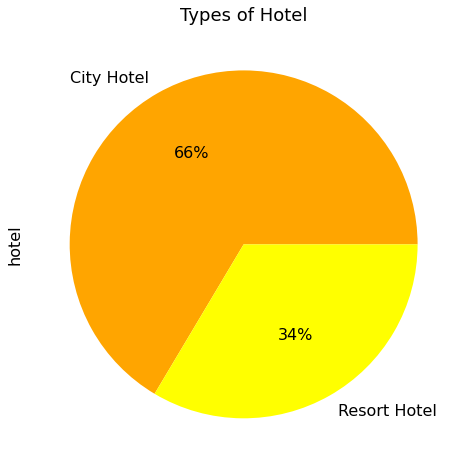

In [22]:
# Let's us use the data visualization tool to find the hotel preference
plt.rcParams['figure.figsize'] = (8,8)

#Lets give the type of chart, colour and size
df['hotel'].value_counts().plot(kind='pie', colors = ['orange','yellow'], autopct='%.0f%%', fontsize = 16)
plt.title('Types of Hotel', fontsize = 18)
plt.ylabel('hotel', fontsize = 16)



*   **Above pie chart city hotel has more preference than the Resort hotel**
*   **City hotel have 66% preference and Resort hotel have 34% preference**





# Q 2 Check the cancellation data using data visualization 

Text(0, 0.5, 'count')

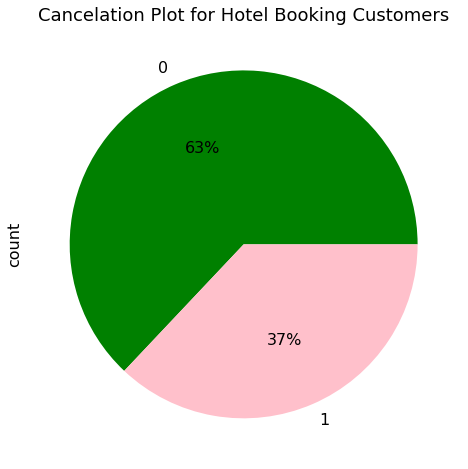

In [23]:
# Let's plot the chart to show the data 
df.is_canceled.value_counts().plot(kind='pie', colors = ['green', 'pink'], autopct='%.0f%%', fontsize = 16)
plt.title('Cancelation Plot for Hotel Booking Customers', fontsize = 18)
plt.ylabel('count', fontsize = 16)



*   **The plot shows 37% bookings were canceled by the customers over 63% is
not canceled**








# Q 3 Let's check it out the arrival data 

In [24]:
# Lets check the data by year
arrival_by_year = df[['arrival_date_year','hotel']].value_counts().groupby('arrival_date_year').sum()

Text(0, 0.5, 'Count of arrival')

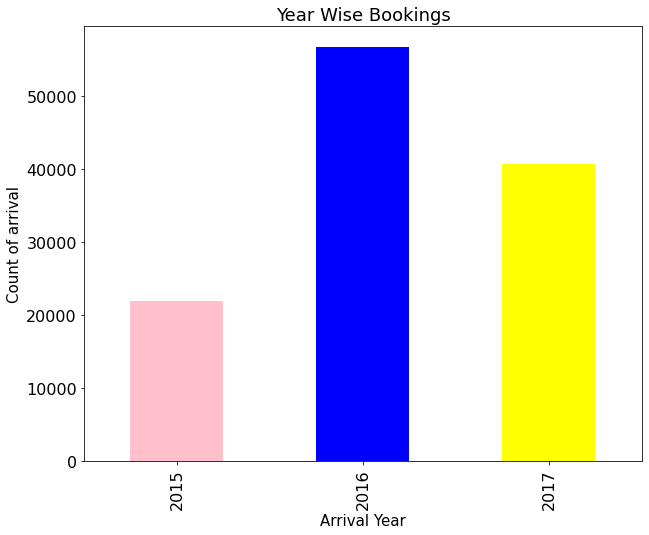

In [25]:
# Lets print the plot 
plt.rcParams['figure.figsize'] = (10,8)
arrival_by_year.plot(kind='bar', color = ['pink', 'blue','yellow'], fontsize = 16)
plt.title('Year Wise Bookings', fontsize = 18)
plt.xlabel('Arrival Year', fontsize = 15)
plt.ylabel('Count of arrival', fontsize = 15)

*   **We can observed that in the year 2016 arrival is more than double of the previous year but also** 


*   **it is observed that arrival has been fallen down in 2017. Hotel Management need to check for the same**








Text(0, 0.5, 'Count of arrival')

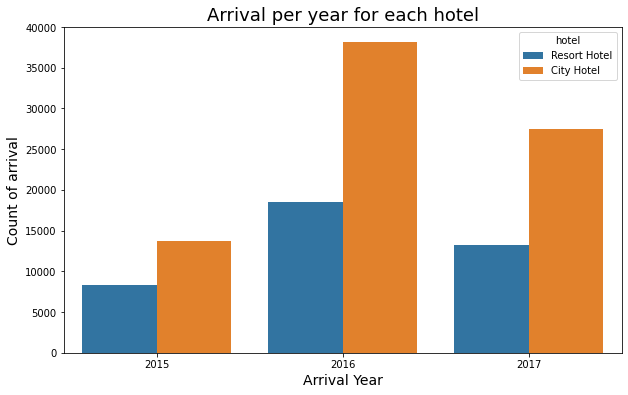

In [26]:
# Let's calculate for both hotels
# Ploting the graph for both hotel 
plt.rcParams['figure.figsize'] = (10,6)
sns.countplot(data = df, x = 'arrival_date_year', hue = 'hotel')
plt.title('Arrival per year for each hotel', fontsize = 18)
plt.xlabel('Arrival Year', fontsize = 14)
plt.ylabel('Count of arrival', fontsize = 14)



*   **We can observe that number of arrivals seems to be high in year 2016 for city hotel compared to Resort Hotel, while the bookings seem to be less in 2015 and 2017 for both resort hotel and city hotel.** 









Text(0, 0.5, 'Count of Arrival')

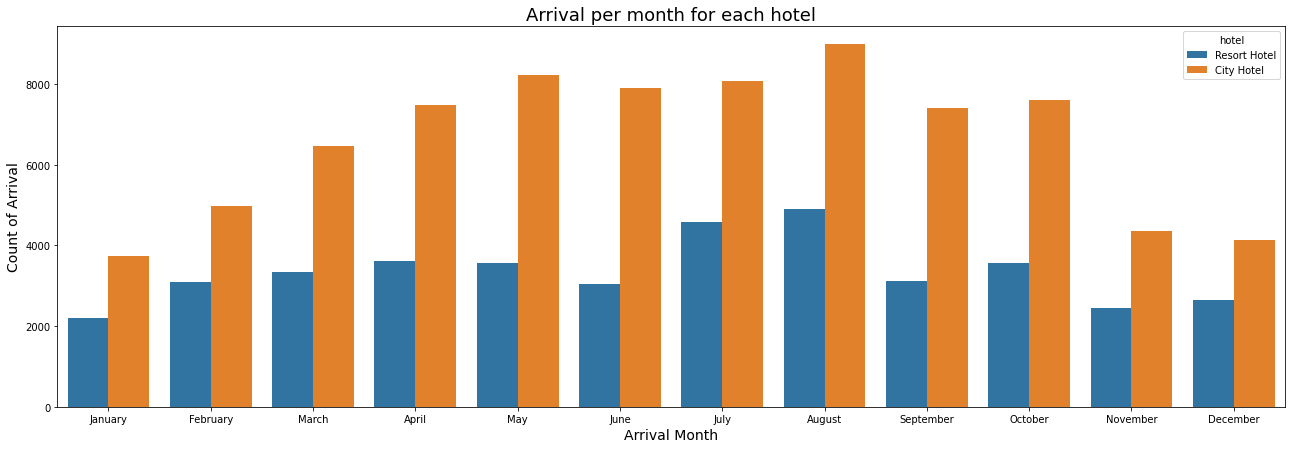

In [27]:
# let's us check arrival per month 
# Creating the plot arrival per month
plt.rcParams['figure.figsize'] = (22,7)
sns.countplot(data = df, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February','March', 'April','May','June','July','August','September','October','November','December'])
plt.title('Arrival per month for each hotel', fontsize = 18)
plt.xlabel('Arrival Month', fontsize = 14)
plt.ylabel('Count of Arrival', fontsize = 14)



*   **We observed that for initial month of the year arrival is less compared to mid-months.**


*   **For month May, June,July and August maximum arrival has been seen**

*   **for last 2 months trends follows with Jan and Feb Month** 




In [28]:
# Lets check more preferred country 
# We will consider only top 10 countries
most_preferred_country = df['country'].value_counts().head(10)
most_preferred_country

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Text(0, 0.5, 'Counts')

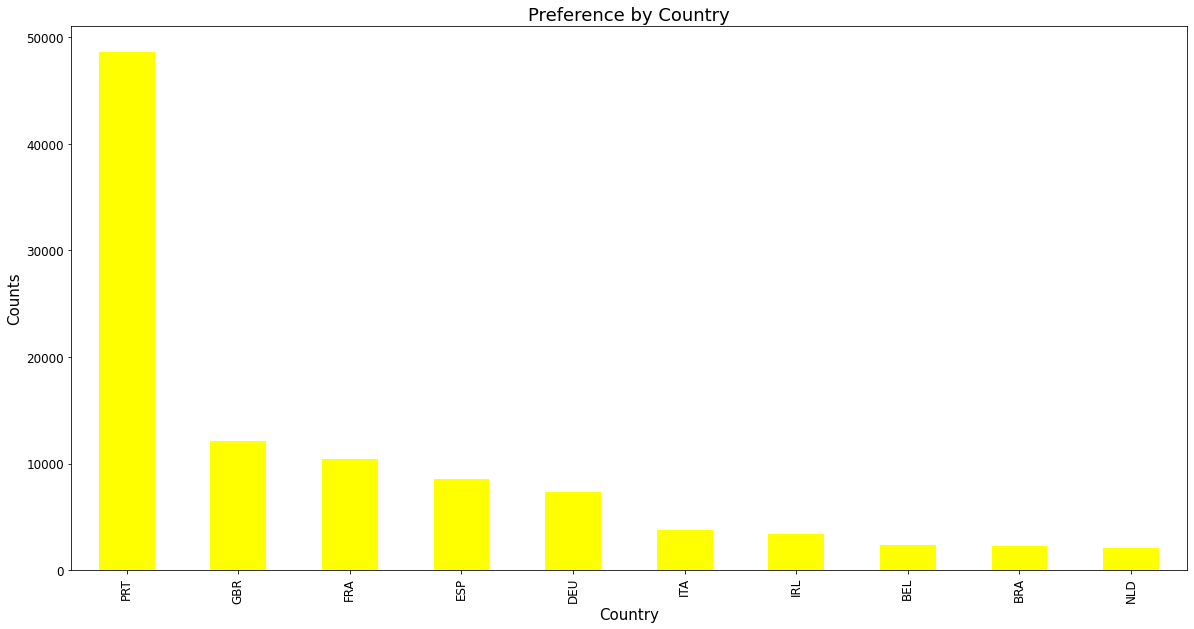

In [29]:
#let's print on the plot 
plt.rcParams['figure.figsize'] = (20,10)
most_preferred_country.plot(kind='bar', color = ['yellow'], fontsize = 12)
plt.title('Preference by Country', fontsize = 18)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)

* **Most preferred country is PRT followed by GBR**   



# Q 4 Let us visulize the cancellation data 

In [30]:
#Lets find the cancelled booking
cancelation_data = df.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()

In [31]:
cancelation_data

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


Text(0, 0.5, 'Count')

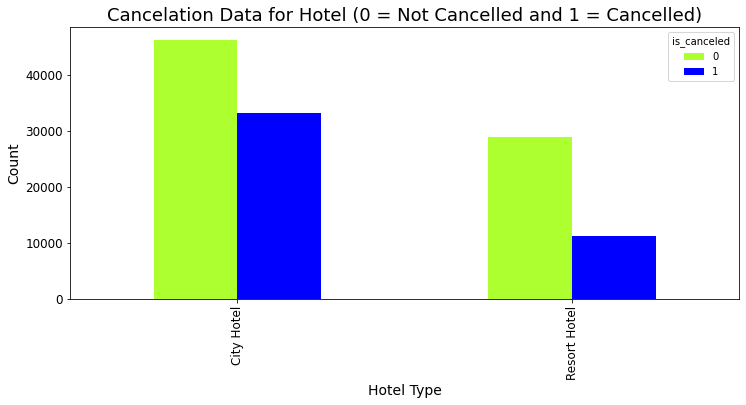

In [32]:
# let's analyze using the plot 
plt.rcParams['figure.figsize'] = (12,5)
cancelation_data.plot(kind = 'bar', color = ['greenyellow', 'blue'], fontsize = 12)
plt.title('Cancelation Data for Hotel (0 = Not Cancelled and 1 = Cancelled)', fontsize = 18)
plt.xlabel('Hotel Type', fontsize = 14)
plt.ylabel('Count', fontsize = 14)



*  **We observed that city hotel have more cancellation than the Resort hotel hence Hotel Management need to take proper decision to minimize the cancellation**  



# Q 5 Analysis the data on the basis of ADR (Average Daily Count Rate)

In [33]:
# Let's find out of Average ADR for types of hotel
average_adr_hotel = df.groupby(['hotel'])['adr'].mean()
average_adr_hotel


hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64

Text(0, 0.5, 'Average ADR')

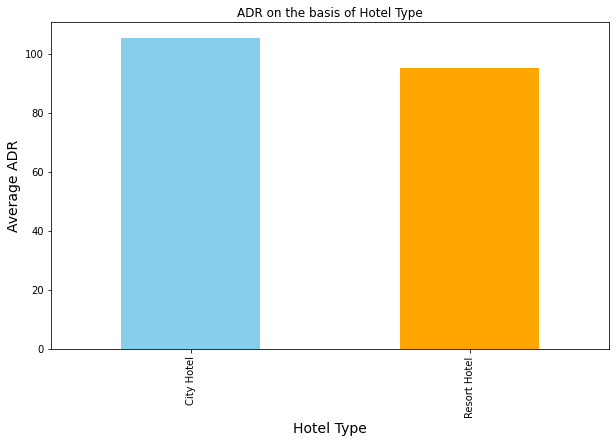

In [34]:
#let's visualize using plot
plt.rcParams['figure.figsize'] = (10,6)
average_adr_hotel.plot(kind = 'bar', color = ['skyblue', 'orange'], fontsize = 10)
plt.title('ADR on the basis of Hotel Type')
plt.xlabel('Hotel Type', fontsize = 14 )
plt.ylabel('Average ADR', fontsize = 14)



*    **ADR for city hotel is slightely more than Resort Hotel**





In [35]:
# Let's check ADR for top 10 countries
country_adr = df.groupby(['country'])['adr'].mean().sort_values(ascending = False)[0:10]

country_adr

country
DJI    273.000000
AIA    265.000000
AND    202.652857
UMI    200.000000
LAO    181.665000
MYT    177.750000
NCL    175.500000
GEO    169.015909
COM    165.305000
FRO    155.200000
Name: adr, dtype: float64

Text(0, 0.5, 'Average ADR')

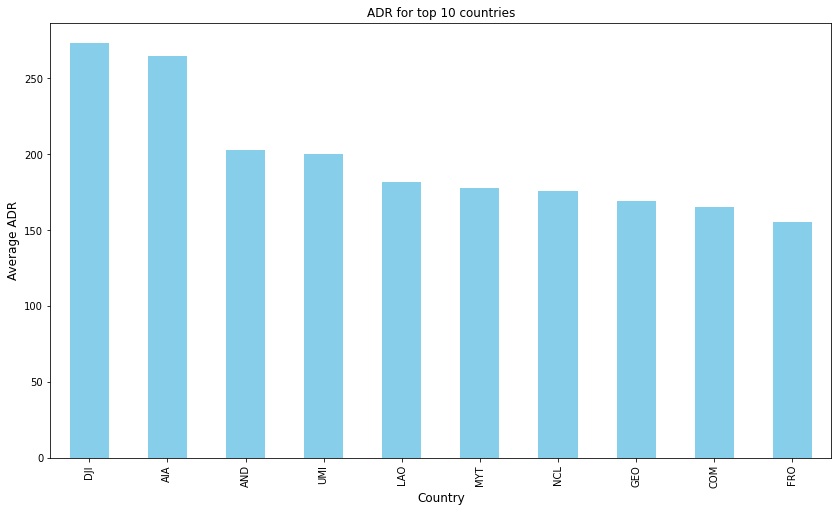

In [36]:
# Let's check with the graph
plt.rcParams['figure.figsize'] = (14,8)
country_adr.plot(kind = 'bar', color = 'skyblue', fontsize = 10)
plt.title('ADR for top 10 countries')
plt.xlabel('Country', fontsize = 12 )
plt.ylabel('Average ADR', fontsize = 12)


*   **We can see DJI have highest ADR comparing to all other countries**




In [37]:
# Let's Now we will check the ADR for different month and year
month_year_adr = df.groupby(['arrival_date_month','arrival_date_year'])['adr'].mean()

In [38]:
month_year_adr

arrival_date_month  arrival_date_year
April               2016                  88.918920
                    2017                 111.370903
August              2015                 105.922888
                    2016                 142.893595
                    2017                 164.248370
December            2015                  74.079243
                    2016                  86.370246
February            2016                  70.102269
                    2017                  76.824005
January             2016                  64.767656
                    2017                  73.777264
July                2015                  97.834316
                    2016                 125.484536
                    2017                 143.037770
June                2016                 106.977315
                    2017                 125.757599
March               2016                  79.069326
                    2017                  82.242660
May                 2016  

Text(0, 0.5, 'ADR')

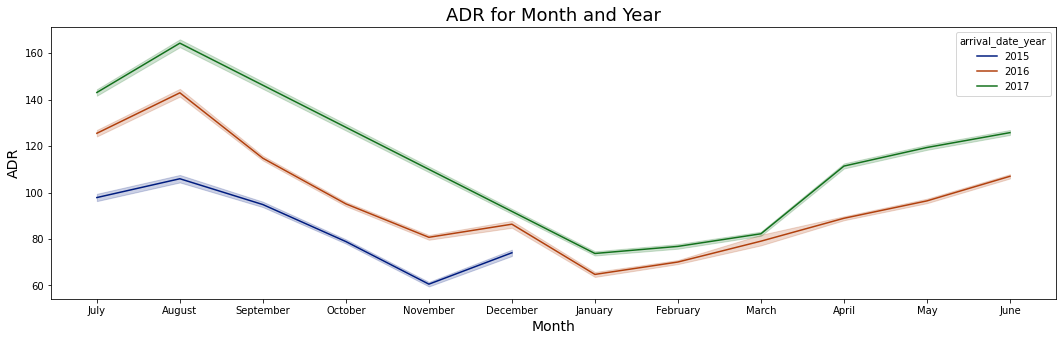

In [39]:
# Let's do the visulization 
line,ax = plt.subplots(figsize=(18,5))
sns.lineplot(x='arrival_date_month', y='adr', data=df, hue='arrival_date_year', palette='dark')
ax.set_title('ADR for Month and Year', fontsize = 18)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('ADR', fontsize = 14)



*  **As per above line plot we can clearly seen that Hotel Business scaling up each and every year**




# Q 6 Lets check the Daily rate  

In [40]:
# Let's we will calculate 
# Let us initially calculate the not cancelled booking 
not_cancelled_guests = df.loc[df['is_canceled']==0]

In [41]:
# Now we will calculate the price per guest 
# New column has been added in our data as price
df['price'] = not_cancelled_guests['adr']*not_cancelled_guests['total_num_of_stay']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_num_of_stay,revenue,is_cancelled,price
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,not_canceled,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0,not_canceled,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0,not_canceled,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,1,75.0,not_canceled,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2,196.0,not_canceled,196.0


Text(0, 0.5, 'Price paid for Stay')

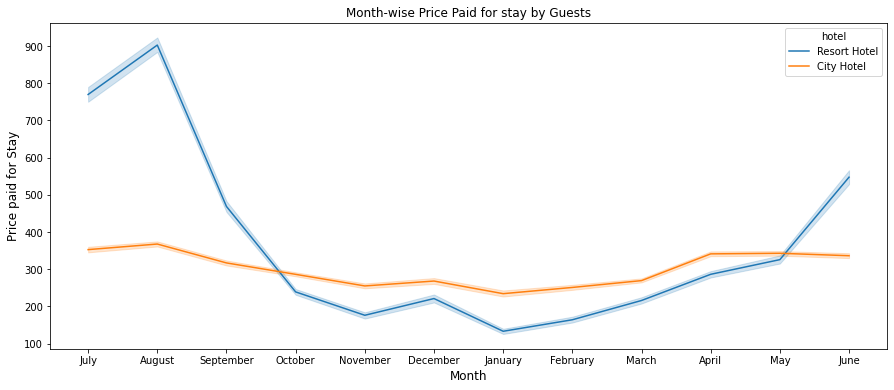

In [42]:
#let's visualize the data by using lineplot using month
plt.rcParams['figure.figsize'] = (15,6)
sns.lineplot(data=df, x =df['arrival_date_month'], y=df['price'], hue='hotel')
plt.title('Month-wise Price Paid for stay by Guests', fontsize = 12)
plt.xlabel('Month', fontsize = 12 )
plt.ylabel('Price paid for Stay', fontsize = 12)

*   **We observed that price paid by guest in city hotel is lower than the Resort Hotel**


*   **Price of Resort Hotel are more than City Hotel in Month of June, July, August, September. For rest of the months, Price of city Hotel are consistently higher thar Resort Hotel** 

# Q 7 Analysis using Correlation Heatmap

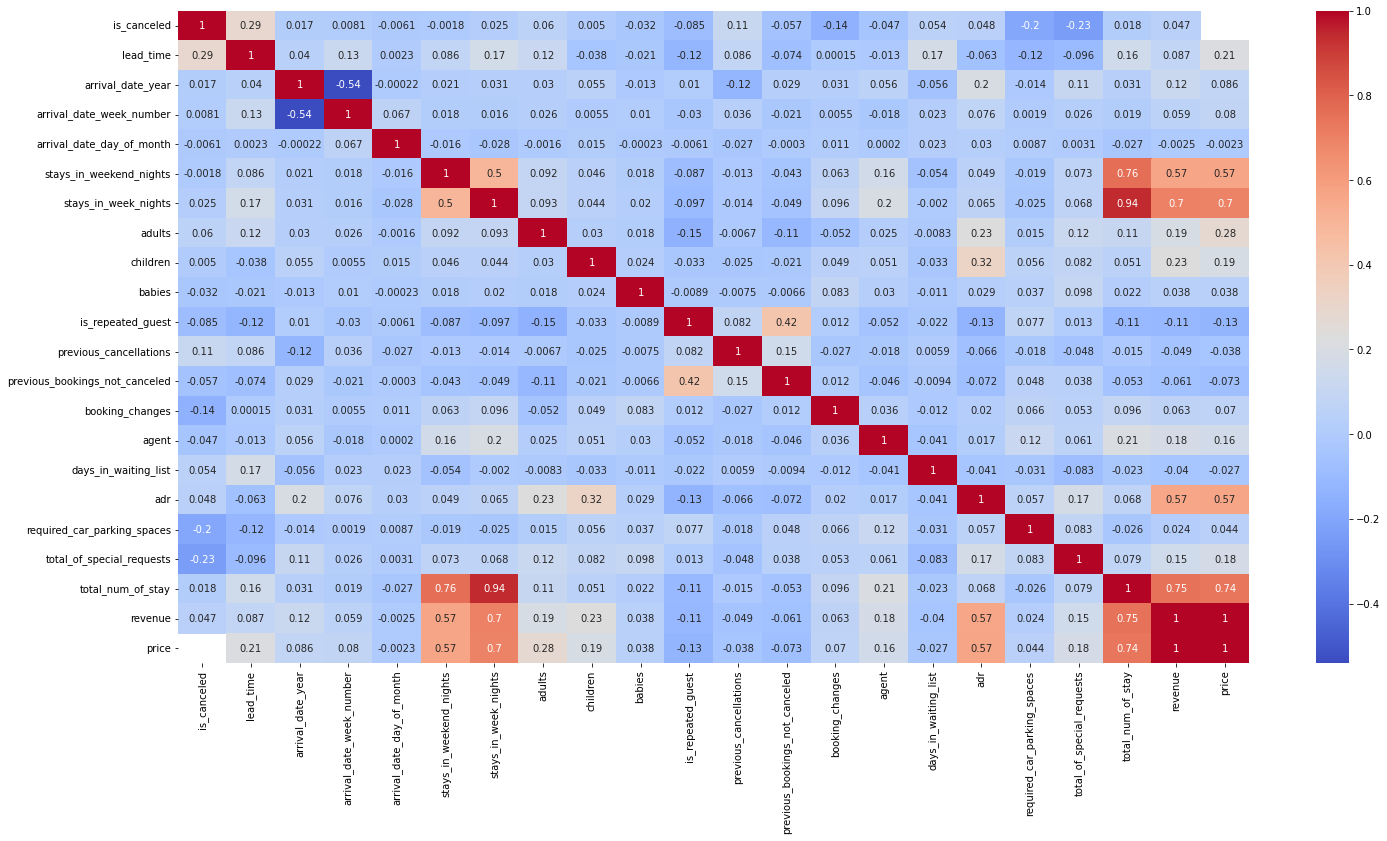

In [43]:
plt.rcParams['figure.figsize'] = 24,12
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True);

*   **Focus on revenue, stay_in_week_nights total_num_of_stay , we can verify that, revenue were almost same for stay_in_week_nights and total_num_of_stay**


*   **Also it is obsereved that stay_in_week_nights was more than the weekend night stay**

# **Conclusions**

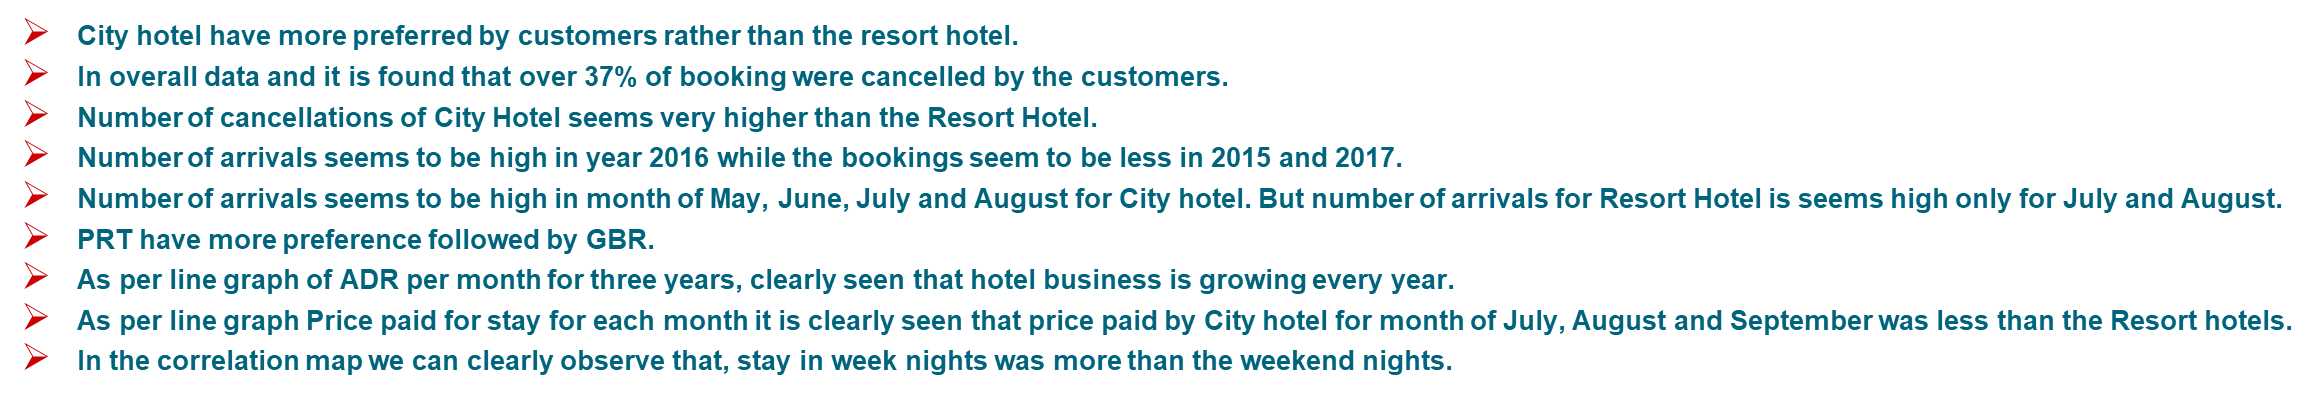